cluster Analysis :         sepal length (cm)                     sepal width (cm)            \
                     mean  min  max       std             mean  min  max   
cluster                                                                    
0                6.696364  5.8  7.9  0.508070         3.060000  2.5  3.8   
1                5.016327  4.3  5.8  0.348417         3.451020  2.9  4.4   
2                5.704348  4.5  6.4  0.421087         2.634783  2.0  3.0   

                  petal length (cm)                     petal width (cm)       \
              std              mean  min  max       std             mean  min   
cluster                                                                         
0        0.260057          5.418182  4.4  6.9  0.635403         1.938182  1.3   
1        0.345882          1.465306  1.0  1.9  0.173867         0.244898  0.1   
2        0.262651          4.215217  1.3  5.6  0.703947         1.332609  0.3   

                        
         max

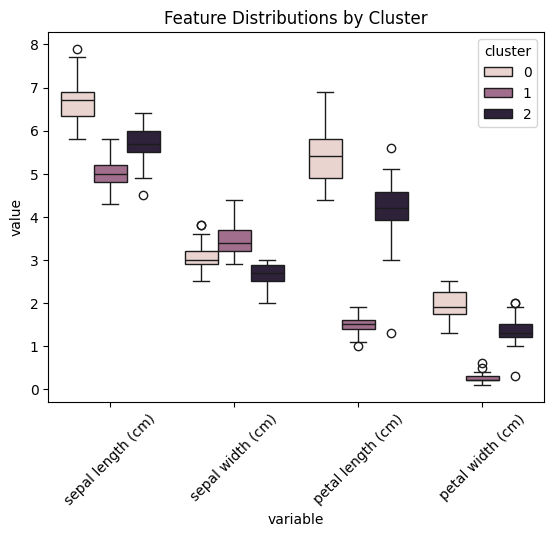

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

iris=load_iris()
x=iris.data
feature_names=iris.feature_names

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

kmeans=KMeans(n_clusters=3,init='k-means++')
clusters=kmeans.fit_predict(x_scaled)

df=pd.DataFrame(x,columns=feature_names)
df['cluster']=clusters

cluster_summary=df.groupby('cluster').agg(['mean','min','max','std'])
print("cluster Analysis :", cluster_summary)

true_label=iris.target
df['True_label']=true_label

comparison=pd.crosstab(df['cluster'],df['True_label'])
print("cluster vs True lable: ", comparison)

df_melted = df.melt(id_vars=['cluster'], value_vars=feature_names)
sns.boxplot(x='variable', y='value', hue='cluster', data=df_melted)
plt.xticks(rotation=45)
plt.title('Feature Distributions by Cluster')
plt.show()

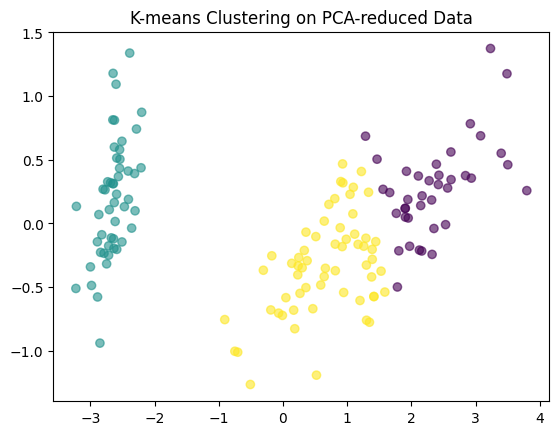

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title("K-means Clustering on PCA-reduced Data")
plt.show()
